<a href="https://colab.research.google.com/github/Zabihuddin/engineering-blog-samples/blob/master/0image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive to access uploaded files (if necessary)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/images/vechicls'

# Define data generator with preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    validation_split=0.2 # Split data into training and validation (80%-20%)
)

# Training data generator
train_generator = datagen.flow_from_directory(
    file_path,
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,         # Number of images per batch
    class_mode='binary',   # For binary classification (Happy/Sad)
    subset='training'      # Training subset
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    file_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'    # Validation subset
)


Found 122 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
# Display the classes and number of images
print("Classes:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", val_generator.samples)


Classes: {'bikes': 0, 'cars': 1}
Number of training samples: 122
Number of validation samples: 30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


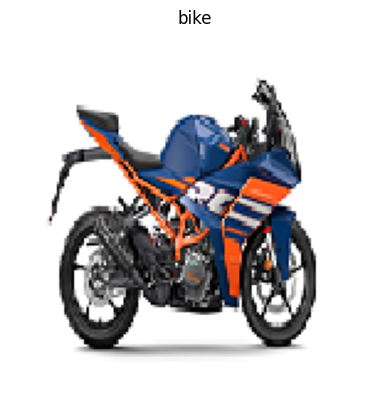

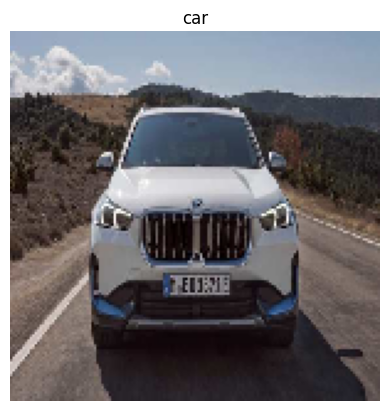

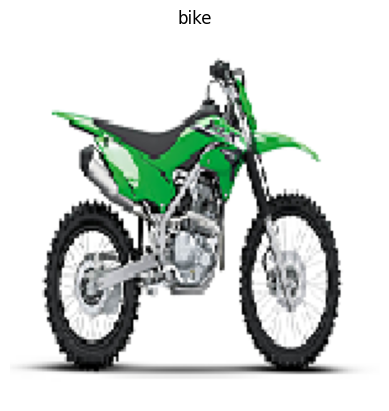

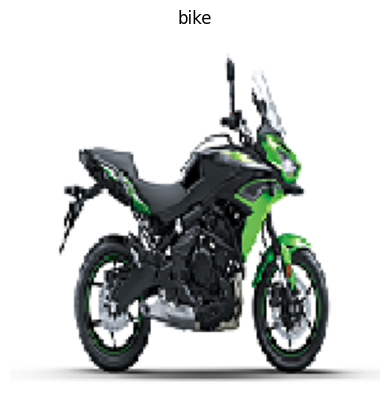

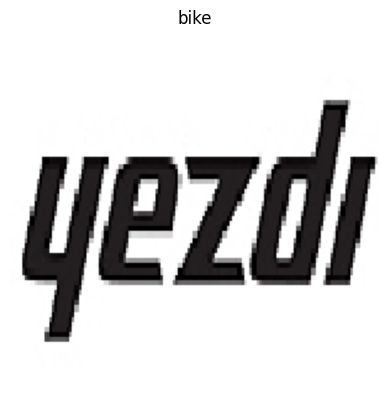

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of training images
images, labels = next(train_generator)

# Plot the first 5 images
for i in range(5):
    plt.imshow(images[i])
    plt.title("bike" if labels[i] == 0 else "car")
    plt.axis('off')
    plt.show()






In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())  # Optional: Display the model's architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.4474 - loss: 2.8841 - val_accuracy: 0.6667 - val_loss: 0.6396
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7082 - loss: 0.4596 - val_accuracy: 0.6667 - val_loss: 0.5727
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8860 - loss: 0.2851 - val_accuracy: 0.6667 - val_loss: 0.4998
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8933 - loss: 0.2162 - val_accuracy: 0.6667 - val_loss: 0.5299
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9705 - loss: 0.1236 - val_accuracy: 0.8000 - val_loss: 0.4949
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0609 - val_accuracy: 0.7667 - val_loss: 0.4822
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 0.8333 - val_loss: 0.4082
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.9333 - val_loss: 0.3704
Epoch 9/10
4/4 ━━━━━━━━

In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


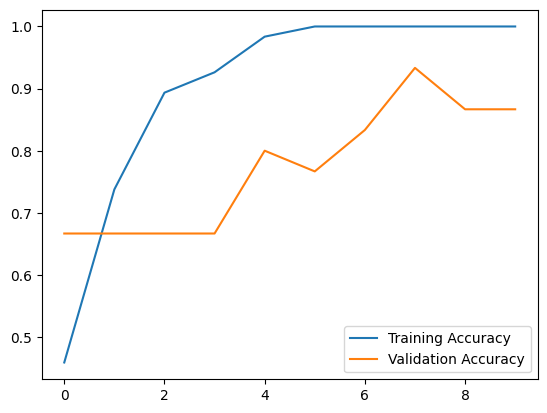

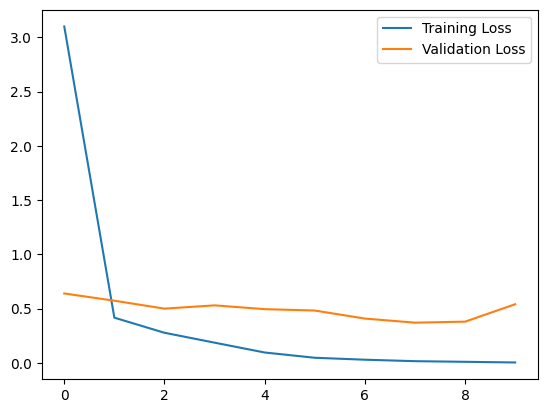

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/images/saved_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8667 - loss: 0.5403
Validation Loss: 0.5403204560279846
Validation Accuracy: 0.8666666746139526


In [ ]:
# Test on New Data/ Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the image you want to test
#image_path = '/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-22.jpg'

# Load the image and preprocess it
img = load_img(image_path, target_size=(150, 150))  # Resize to 150x150 (same as during training)
img_array = img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction: car


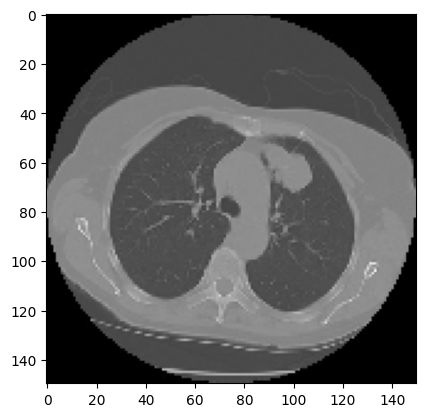

In [ ]:
# Make a prediction
prediction = model.predict(img_array)

# Interpret the result
if prediction[0][0] > 0.5:
    print("Prediction: car")
else:
    print("Prediction: bike")
plt.imshow(img) # display the given image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

image_path = "/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-21.jpg"  # Correct image path

# Function to load and preprocess a single image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image for ResNet50 model.
    Args:
    - image_path (str): The path to the image.
    - target_size (tuple): The target size for image resizing.

    Returns:
    - Processed image array ready for prediction.
    """
    # Load the image
    img = load_img(image_path, target_size=target_size)

    # Convert image to array
    img_array = img_to_array(img)

    # Expand dimensions to match model input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (mean subtraction, scaling, etc.)
    return preprocess_input(img_array)

# Example usage:
processed_image = load_and_preprocess_image(image_path)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Build the model using ResNet50 as the base model (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid training its layers
base_model.trainable = False

# Add custom layers on top of ResNet50 for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling layer to reduce dimensionality
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator to perform data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels
)

# Assuming you have a directory 'train_data' with 'class_0' and 'class_1' subfolders
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/images/medical',  # Your image dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
)

# Check the class labels
print(train_generator.class_indices)


Found 4 images belonging to 3 classes.
{'brain': 0, 'heart': 1, 'mind': 2}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Example model setup (assuming you are using ResNet50 as the base model)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a new model by adding custom layers on top of ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(3, activation='softmax')  # Modify this to match the number of classes (3 in this case)
])

# Compile the model before training
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the train_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5  # Modify the number of epochs as needed
)

# Optionally, fine-tune the model by unfreezing some layers of the base model
base_model.trainable = True

# Freeze all layers except the last few layers of ResNet50
for layer in base_model.layers[:143]:  # Unfreeze from layer 143 onwards
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5  # Additional epochs after fine-tuning
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 1.5064
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.5043
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - accuracy: 0.5000 - loss: 1.5125
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - accuracy: 0.5000 - loss: 1.5026
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step - accuracy: 0.5000 - loss: 1.5059
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 1.0465
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9205
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.0385
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 0.9391
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.8729


In [ ]:
# Train the model using the train_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5  # Modify the number of epochs as needed
)

# Optionally, fine-tune the model by unfreezing some layers of the base model
base_model.trainable = True

# Freeze all layers except the last few layers of ResNet50
for layer in base_model.layers[:143]:  # Unfreeze from layer 143 onwards
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5  # Additional epochs after fine-tuning
)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7591
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8788
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6129
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6700
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6165
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.7011
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7695
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7350
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9061
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6667


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: 2


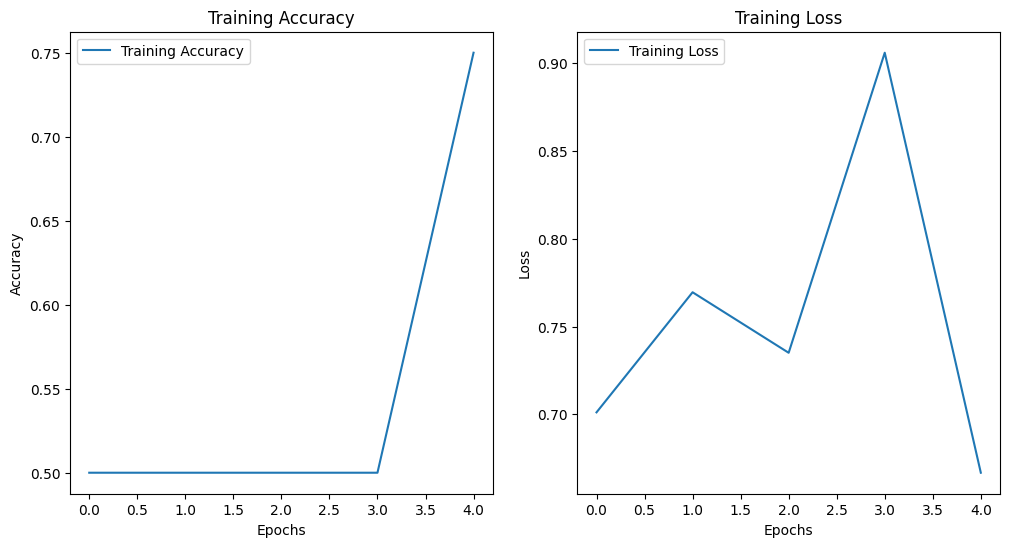

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate the model on a new image
def evaluate_image(image_path):
    img = load_and_preprocess_image(image_path)
    pred = model.predict(img)
    print(f"Predicted Class: {np.argmax(pred)}")

# Example usage: evaluate a new image
evaluate_image('/content/drive/MyDrive/Colab Notebooks/images/medical/mind/1-23.jpg')  # Replace with your test image path

# Plot training history (accuracy & loss over epochs)
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history_fine_tune)


In [ ]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import os
image_path = "/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-21.jpg"
# Load image using OpenCV
def load_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32') / 255.0  # Normalize to range [0, 1]
    return img

# Feature extraction using VGG16 (pre-trained model)
def extract_features(img_path):
    # Load and preprocess image
    img = load_image(img_path)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)

    # Load VGG16 model
    model = VGG16(weights='imagenet', include_top=False)
    features = model.predict(img)
    features = features.flatten()  # Flatten to 1D vector
    return features

# Compare two images using SSIM, MSE, and Cosine Similarity
def compare_images(image1_path, image2_path, win_size=7):
    # Load and preprocess images
    try:
        img1 = load_image(image1_path, target_size=(128, 128))
        img2 = load_image(image2_path, target_size=(128, 128))
    except FileNotFoundError as e:
        print(e)
        return None, None, None

    # Compute SSIM (Structural Similarity Index)
    ssim_value = ssim(img1, img2, channel_axis=-1, win_size=win_size, data_range=1.0)

    # Compute MSE (Mean Squared Error)
    mse_value = np.mean((img1 - img2) ** 2)

    # Extract deep features using VGG16
    features1 = extract_features(image1_path)
    features2 = extract_features(image2_path)

    # Compute Cosine Similarity between feature vectors
    cosine_sim = cosine_similarity([features1], [features2])[0][0]

    return ssim_value, mse_value, cosine_sim

# Example usage to compare images
image1_path = '/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-21.jpg'
image2_path = '/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-22.jpg'

if os.path.exists(image1_path) and os.path.exists(image2_path):
    ssim_val, mse_val, cosine_sim = compare_images(image1_path, image2_path, win_size=7)

    if ssim_val is not None:
        print(f"SSIM between images: {ssim_val}")
        print(f"MSE between images: {mse_val}")
        print(f"Cosine Similarity between images: {cosine_sim}")
else:
    print("One or both image paths are invalid.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
SSIM between images: 0.8535110354423523
MSE between images: 0.002058702753856778
Cosine Similarity between images: 0.9999982118606567


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


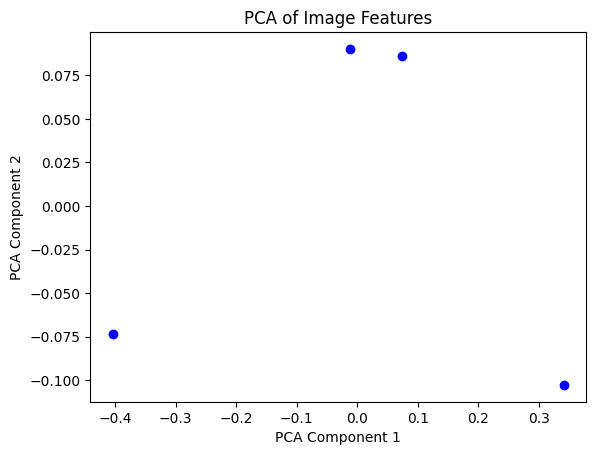

In [ ]:
def pca_visualization(image_paths):
    # Extract features from all images
    features = [extract_features(img_path) for img_path in image_paths]

    # Perform PCA (reduce to 2D)
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)

    # Plot the 2D projection of images
    plt.scatter(pca_features[:, 0], pca_features[:, 1], color='blue')
    plt.title('PCA of Image Features')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Example usage: Visualize PCA for a list of image paths
image_paths = ['/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-21.jpg', '/content/drive/MyDrive/Colab Notebooks/images/medical/brain/1-22.jpg', '/content/drive/MyDrive/Colab Notebooks/images/medical/mind/1-23.jpg', '/content/drive/MyDrive/Colab Notebooks/images/medical/mind/1-24.jpg']
pca_visualization(image_paths)


In [ ]:
from sklearn.cluster import KMeans

def cluster_images(image_paths, n_clusters=3):
    # Extract features from images
    features = [extract_features(img_path) for img_path in image_paths]

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)

    # Get the cluster labels for each image
    labels = kmeans.labels_
    return labels

# Example usage: Cluster images and print cluster assignments
labels = cluster_images(image_paths, n_clusters=3)
print("Cluster labels for the images:", labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Cluster labels for the images: [1 0 0 2]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import os

# Step 1: Preprocess images (resize, normalize)
def preprocess_image(image_path, target_size=(128, 128)):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image at path: {image_path}")
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize to range 0-1
    return img

# Step 2: Load and preprocess dataset
# Example: Define 'images' and 'labels' lists
images_dir = "/content/drive/MyDrive/Colab Notebooks/images/medical/z"
images = [os.path.join(images_dir, fname) for fname in os.listdir(images_dir) if fname.endswith(('.jpg', '.png', '.jpeg'))]
labels = [fname.split('-')[0] for fname in os.listdir(images_dir) if fname.endswith(('.jpg', '.png', '.jpeg'))]

# Preprocess images
X = np.array([preprocess_image(img) for img in images])
y = np.array(labels)

# Step 3: Encode labels for classification
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Create and train model (e.g., CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 1.7511 - val_accuracy: 0.0000e+00 - val_loss: 30.1757
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - accuracy: 0.2500 - loss: 3.1641 - val_accuracy: 0.0000e+00 - val_loss: 38.4926
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - accuracy: 0.2500 - loss: 5.4086 - val_accuracy: 0.0000e+00 - val_loss: 44.4688
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.2500 - loss: 9.1330 - val_accuracy: 0.0000e+00 - val_loss: 48.4916
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step - accuracy: 0.2500 - loss: 10.2114 - val_accuracy: 0.0000e+00 - val_loss: 39.4288
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 4.1124 - val_accuracy: 0.0000e+00 - val_loss: 34.9667
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.4901 - val_accuracy: 0.0000e+00 - val_loss: 34.4330
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step - accuracy: 0.5000 - loss: 3.4175 - val_a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Class Distribution: Counter({24: 21, 37: 7, 10: 4, 11: 2, 2: 1, 13: 1, 25: 1, 6: 1, 29: 1, 33: 1, 17: 1, 35: 1, 20: 1, 26: 1, 23: 1, 28: 1, 14: 1, 36: 1, 19: 1, 31: 1, 3: 1, 4: 1, 16: 1, 0: 1, 8: 1, 15: 1, 30: 1, 22: 1, 18: 1, 9: 1, 1: 1, 5: 1, 7: 1, 12: 1, 21: 1, 34: 1, 38: 1, 27: 1, 32: 1})


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1357 - loss: 5.6028 - val_accuracy: 0.0000e+00 - val_loss: 6.3388
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 706ms/step - accuracy: 0.0347 - loss: 6.5076 - val_accuracy: 0.0714 - val_loss: 3.7997
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step - accuracy: 0.0693 - loss: 3.9119 - val_accuracy: 0.1429 - val_loss: 3.5218
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3206 - loss: 3.4061 - val_accuracy: 0.1429 - val_loss: 3.5368
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3102 - loss: 3.3868 - val_accuracy: 0.1429 - val_loss: 3.5375
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 864ms/step - accuracy: 0.3607 - loss: 3.2861 - val_accuracy: 0.1429 - val_loss: 3.5144
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 854ms/step - accuracy: 0.3486 - loss: 3.2895 - val_accuracy: 0.1429 - val_loss: 3.7018
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 669ms/step - accuracy: 0.3345 - loss: 3.2102 - val_accuracy: 0.1429 - val_loss: 3.6898
Epoch 9/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


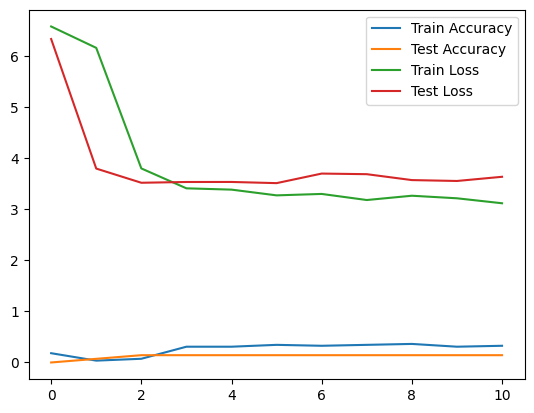

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import os

# Preprocessing function
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize to range 0-1
    return img

# Dataset loading
images_dir = "/content/drive/MyDrive/Colab Notebooks/images/vechicls/bikes"
images = [os.path.join(images_dir, fname) for fname in os.listdir(images_dir) if fname.endswith(('.jpg', '.png'))]
labels = [fname.split('-')[0] for fname in os.listdir(images_dir) if fname.endswith(('.jpg', '.png'))]

X = np.array([preprocess_image(img) for img in images])
y = np.array(labels)

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Balance check
print("Class Distribution:", Counter(y_encoded))

# Train-test split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)  # Remove stratify parameter

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Build the CNN Model
def build_model(dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with data augmentation
model = build_model(dropout_rate=0.5, learning_rate=0.001)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, np.argmax(y_pred, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))

# Plot training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()


In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define the model function
def build_model(dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Convert the Keras model to a scikit-learn compatible model
model = KerasClassifier(
    model=build_model,
    verbose=0
)

# Define the parameter grid
param_grid = {
    'model__dropout_rate': [0.3, 0.5],
    'model__learning_rate': [0.001, 0.0001],
    'batch_size': [32, 64],
    'epochs': [10, 20],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_result.best_params_)

# Evaluate the best model
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters:  {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.5, 'model__learning_rate': 0.001}
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       0.17      1.00      0.29         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2

    accuracy                           0.14        14
   macro avg       0.01      0.08      0.02        14
weighted avg       0.02 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_